<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-3/blob/main/Abalos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
import imutils
%matplotlib inline

In [2]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=1d47d976b756abac03e4f131f9c0f26582e43ce3fc39f44b333df320e0a984be
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [3]:
!apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 0s (29.9 MB/s)
Selecting previously unselecte

In [4]:
import pytesseract

In [5]:
!wget https://www.dropbox.com/s/2hsbbd0avyonhfs/Abalos.zip?dl=0 -O abalos.zip

--2021-05-18 15:44:30--  https://www.dropbox.com/s/2hsbbd0avyonhfs/Abalos.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2hsbbd0avyonhfs/Abalos.zip [following]
--2021-05-18 15:44:30--  https://www.dropbox.com/s/raw/2hsbbd0avyonhfs/Abalos.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucce66d93c57f4816c1990f0a0b0.dl.dropboxusercontent.com/cd/0/inline/BOtL7tfAWQ6VsjIvnmiGsPiTd_mjKC-WkQB2VraKeNK5OeuQIdY0iXok9L9cqQDNQGkqnG_9ufnZuAMS-PHKgJeSmmZhWJ1vrk6v7XMKFCXAu5gaP-a52sRPQ6XUO4_zsCmetO_QcpeDSd-NS0oZMZSi/file# [following]
--2021-05-18 15:44:30--  https://ucce66d93c57f4816c1990f0a0b0.dl.dropboxusercontent.com/cd/0/inline/BOtL7tfAWQ6VsjIvnmiGsPiTd_mjKC-WkQB2VraKeNK5OeuQIdY0iXok9L9cqQDNQGkqnG_9ufnZuAMS-PHKgJeS

In [6]:
!unzip abalos.zip

Archive:  abalos.zip
  inflating: Abalos/Abalos_01.jpg    
  inflating: Abalos/Abalos_02.jpg    
  inflating: Abalos/Abalos_03.jpg    
  inflating: Abalos/Abalos_04.jpg    
  inflating: Abalos/Abalos_05.jpg    
  inflating: Abalos/Abalos_06.jpg    
  inflating: Abalos/Abalos_07.jpg    


In [7]:
def mostrarImagen(image):
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.imshow(img2)
        plt.show()
    else:
        img2 = image
        plt.imshow(img2,cmap='gray')
        plt.show()

In [8]:
def identificar_leyenda(leyenda):
    clone = leyenda.copy()
    gray = cv2.cvtColor(leyenda, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 225, 30, cv2.THRESH_OTSU)[1]
    cnts,_ = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  
    for (i, c) in enumerate(cnts):
        area = cv2.contourArea(c)
        if area > 34000 and area < 36000:
            return (i, c)

In [9]:
import os
# Cargando imágenes de Abalos
abalos = {}
leyendas = {}
for image in os.listdir("Abalos"):
    imagen = cv2.imread("Abalos/" + image)
    imagenRecortada=imagen[300:4190,741:6752]
    numero = int(image[-6:-4])
    abalos[numero] = imagenRecortada
    
    (i, c) = identificar_leyenda(imagen)
    (a, b, c, d) = cv2.boundingRect(c)
    x = a
    y = b
    finX = a + c
    finY = b + d
    leyenda = imagen[y:finY, x:finX]
    #mostrarImagen(leyenda)
    leyendas[numero] = leyenda


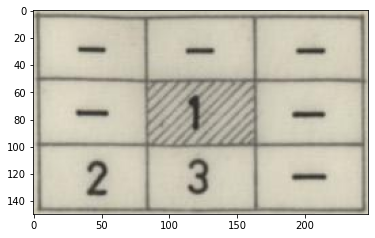

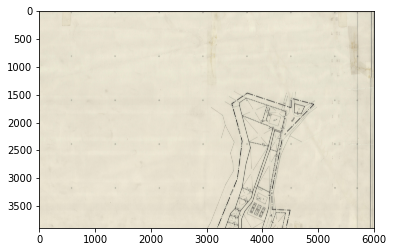

>------------------------------------------------<


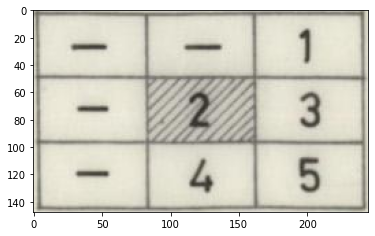

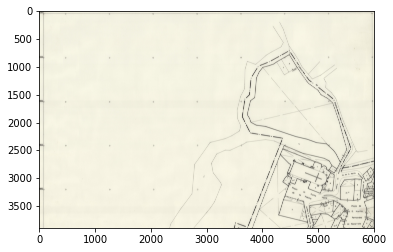

>------------------------------------------------<


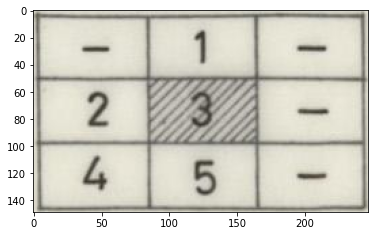

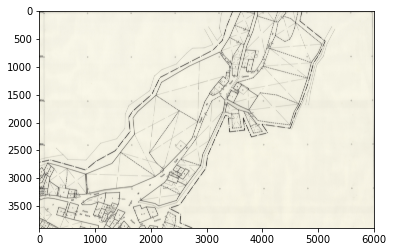

>------------------------------------------------<


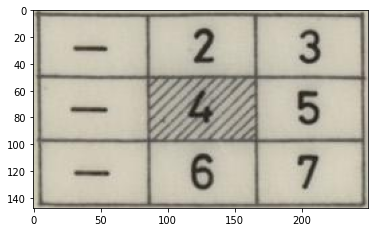

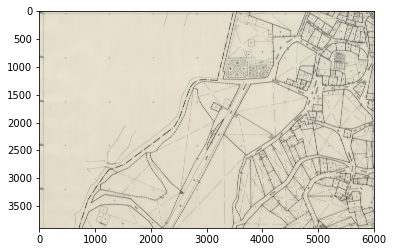

>------------------------------------------------<


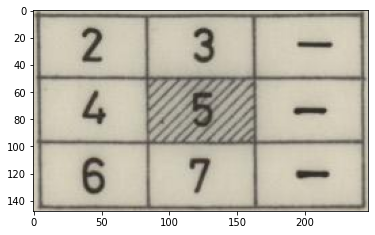

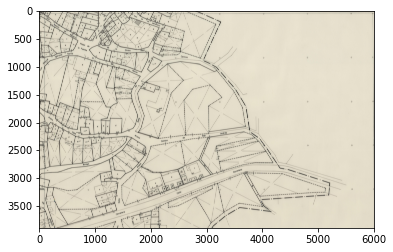

>------------------------------------------------<


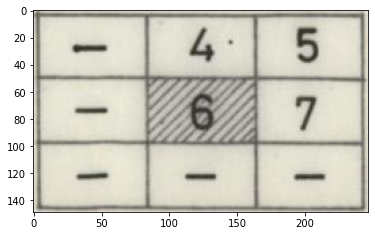

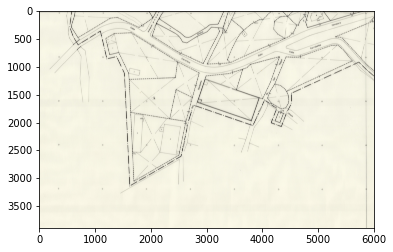

>------------------------------------------------<


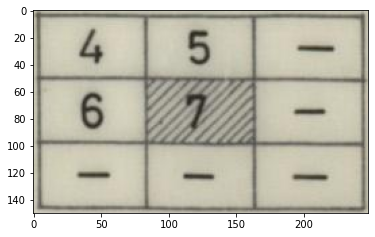

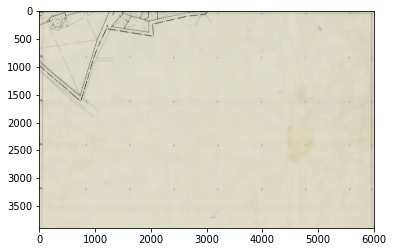

>------------------------------------------------<


In [10]:
for i in range(1, 8):
  mostrarImagen(leyendas[i]) 
  mostrarImagen(abalos[i])
  print('>------------------------------------------------<')

In [11]:
def build_tesseract_options(psm=7):
		# tell Tesseract to only OCR alphanumeric characters
		alphanumeric = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
		options = "-c tessedit_char_whitelist={}".format(alphanumeric)
		# set the PSM mode
		options += " --psm {}".format(psm)
		# return the built options string
		return options

In [12]:
clone = leyendas[5].copy()
gray = cv2.cvtColor(leyendas[5], cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
cnts,_ = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

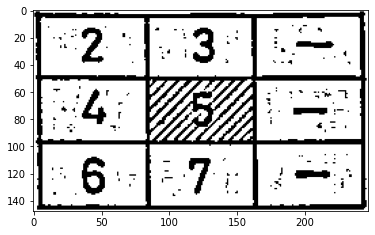

In [13]:
mostrarImagen(thresh)

Contorno #56 -- area=3263.00 -- aspectRatio=1.71 -- extent=0.94 -- hullArea=3308.00


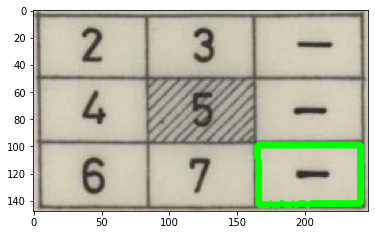

Contorno #57 -- area=3273.50 -- aspectRatio=1.71 -- extent=0.94 -- hullArea=3313.00


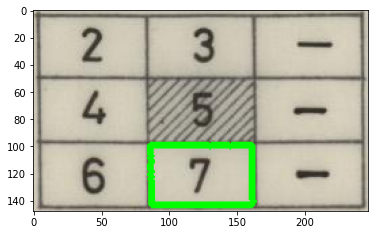

Contorno #58 -- area=3283.50 -- aspectRatio=1.71 -- extent=0.95 -- hullArea=3341.50


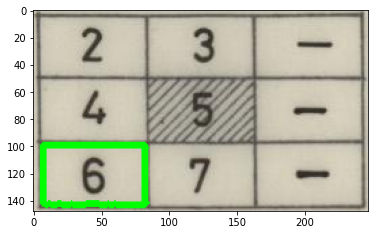

Contorno #126 -- area=3211.00 -- aspectRatio=1.77 -- extent=0.94 -- hullArea=3276.00


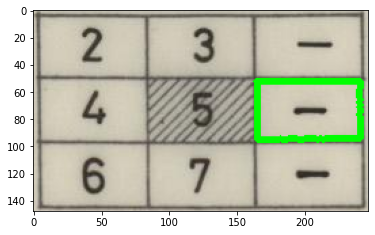

Contorno #134 -- area=3266.50 -- aspectRatio=1.73 -- extent=0.93 -- hullArea=3345.00


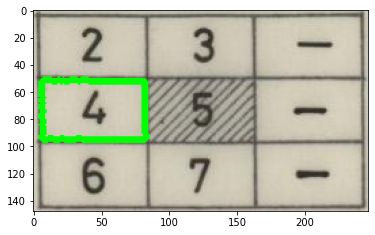

Contorno #191 -- area=3122.00 -- aspectRatio=1.79 -- extent=0.94 -- hullArea=3162.50


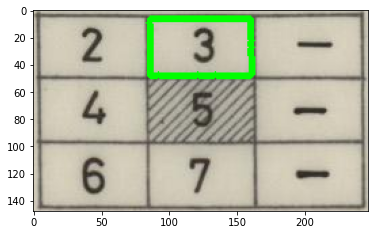

Contorno #192 -- area=3113.00 -- aspectRatio=1.75 -- extent=0.92 -- hullArea=3230.00


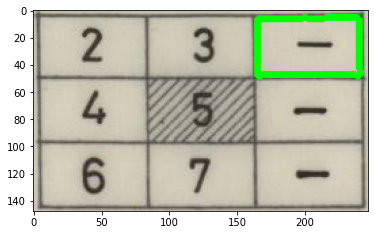

Contorno #193 -- area=3102.50 -- aspectRatio=1.77 -- extent=0.90 -- hullArea=3228.00


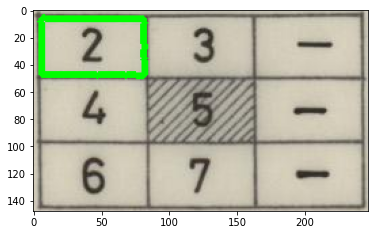

In [14]:
contorno_casillas = []
for (i, c) in enumerate(cnts):
    # Calculamos diversas propiedades
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)
    aspectRatio = w / float(h)
    extent = area / float(w * h)
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    #solidity = area / float(hullArea)

    if area > 3000 and area < 3600:
        contorno_casillas.insert(i, c)
        # Visualizamos cada contorno y el convex hull asociado al mismo
        cv2.drawContours(clone, [c], -1, (240, 0, 159), 3)
        print("Contorno #{} -- area={:.2f} -- aspectRatio={:.2f} -- extent={:.2f} -- hullArea={:.2f}".
              format(i + 1, area, aspectRatio, extent, hullArea))
        clone = leyendas[5].copy()
        cv2.drawContours(clone, [c], -1, (0, 255, 0), 3)
        mostrarImagen(clone)

In [15]:
def sort_contours(cnts):
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes), key=lambda b:(b[1][1],b[1][0]), reverse=False))
    return cnts

In [16]:
contornosOrdenados = sort_contours(contorno_casillas)

In [17]:
boundingBoxesCasillas = [cv2.boundingRect(c) for c in contornosOrdenados]

In [18]:
boundingBoxesCasillas.remove((165, 5, 77, 44))
boundingBoxesCasillas.insert(2,(165, 5, 77, 44))

In [19]:
boundingBoxesCasillas.insert(4,(85,50,80,45))

In [20]:
options = build_tesseract_options(psm=7)

def analizaNumero(imagen):
  gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  #thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
  #thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
  thresh = cv2.threshold(gray, 225, 30, cv2.THRESH_OTSU)[1]
  #mostrarImagen(thresh)
  return pytesseract.image_to_string(imagen, config=options)[0]

In [21]:
vectores = {}
for i in range (1,8):
    vector=[]
    for (a, b, c, d) in boundingBoxesCasillas:
        x    = a + 3
        y    = b + 3
        finX = a + c - 3
        finY = b + d - 3
        imagen = leyendas[i][y:finY, x:finX]
        #mostrarImagen(imagen)
        vector.append(analizaNumero(imagen))
    vectores[i]=vector

In [22]:
for i in range(1, 8):
    j = 0
    for x in vectores[i]:
        try:
            int(x)
        except:
            vectores[i][j] = "-"
        j = j + 1

    vectores[i][4] = str(i)

In [23]:
for i in range(1, 8):
    print(i, ": " , vectores[i])

1 :  ['-', '-', '-', '-', '1', '-', '2', '3', '-']
2 :  ['-', '-', '1', '-', '2', '3', '-', '4', '5']
3 :  ['-', '1', '-', '2', '3', '-', '4', '5', '-']
4 :  ['-', '2', '3', '-', '4', '-', '-', '6', '7']
5 :  ['2', '3', '-', '4', '5', '-', '6', '7', '-']
6 :  ['-', '4', '5', '-', '6', '7', '-', '-', '-']
7 :  ['4', '5', '-', '6', '7', '-', '-', '-', '-']


In [24]:
cadenaFinal = []
for i in range(0, vectores[1].index(str(1)) + 1):
    cadenaFinal.append(vectores[1][i])

for i in range(2, 7):
    for x in range(vectores[i].index(str(i - 1)) + 1, vectores[i].index(str(i)) + 1):
        cadenaFinal.append(vectores[i][x])

for i in range(vectores[7].index(str(7)), len(vectores[7])):
    cadenaFinal.append(vectores[7][i])

print(cadenaFinal)

['-', '-', '-', '-', '1', '-', '2', '3', '-', '4', '5', '-', '6', '7', '-', '-', '-', '-']


In [25]:
arr = []
for i in range(0, len(cadenaFinal), 3):
    arr.append([cadenaFinal[i], cadenaFinal[i + 1], cadenaFinal[i + 2]])

mat = np.asmatrix(arr)
print(mat)

[['-' '-' '-']
 ['-' '1' '-']
 ['2' '3' '-']
 ['4' '5' '-']
 ['6' '7' '-']
 ['-' '-' '-']]


In [26]:
mat = mat[1:-1,:-1]
print(mat)

[['-' '1']
 ['2' '3']
 ['4' '5']
 ['6' '7']]


In [27]:
negro = cv2.threshold(abalos[1].copy(), 225, 0, cv2.THRESH_BINARY_INV)[1]

In [28]:
fil = mat.shape[0]
col = mat.shape[1]

unidas = []
for i in range(0, fil):
    img = []
    for j in range(0, col):
        try:
            img.append(abalos[int(mat.item(i, j))].copy())
        except:
            img.append(negro.copy())

    unidas.append(cv2.hconcat([img[0], img[1]]))

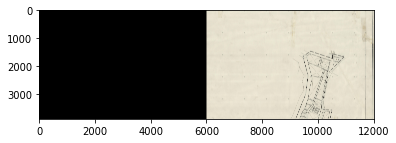

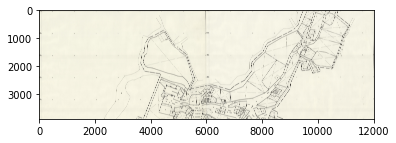

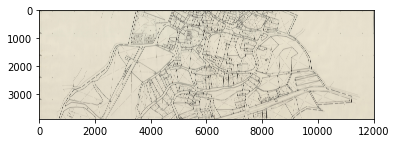

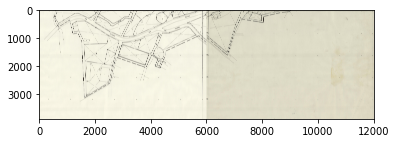

In [29]:
for i in range(0, fil):
    mostrarImagen(unidas[i])

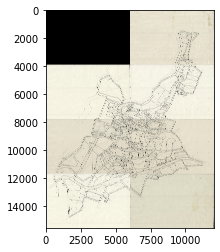

In [30]:
imagen=cv2.vconcat(unidas)
mostrarImagen(imagen)

In [31]:
cv2.imwrite("abalos.jpg",imagen)

True